In [1]:
from expander import *
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize

plt.rcParams["figure.figsize"] = (10, 10)

Let $\gamma:[0,l)\to\varGamma, \gamma(a)=s, \gamma(b)=t$,

$$
\begin{align*}
CAC &= \sup_{a,b\in[0,l)}\Bigg\{ \frac{\min\Big\{ l-b+a, b-a \Big\}}{\|s-t\|} \Bigg\}\\
 &=\sup_{a,b\in[0,l)}\Bigg\{ \frac{\min\Big\{  l-b+a, b-a  \Big\}}{\|\gamma(b) - \gamma(a)\|} \Bigg\}\\
 &=\sup_{b\in(0,l)}\Bigg\{ \frac{\min\Big\{  l-b, b  \Big\}}{\|\gamma(b)\|} \Bigg\}\\
\end{align*}
$$

# Polygon

In [2]:
# generate a polygonal chain
coords = polygon(10)

# make into closed polygon
coords = list(coords)
coords.append(coords[0])
# make the first vertex the origin
coords = np.array(coords) - np.array(coords[0])

# total chord length (l) of the polygon
l = max_chord_length(coords)
print(l)

2.8228977743548818


/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_62638/3718070936.py:6: RuntimeWarning: invalid value encountered in double_scalars
  cac_values.append(min(l-b,b)/(np.linalg.norm(gamma(coords, b))))


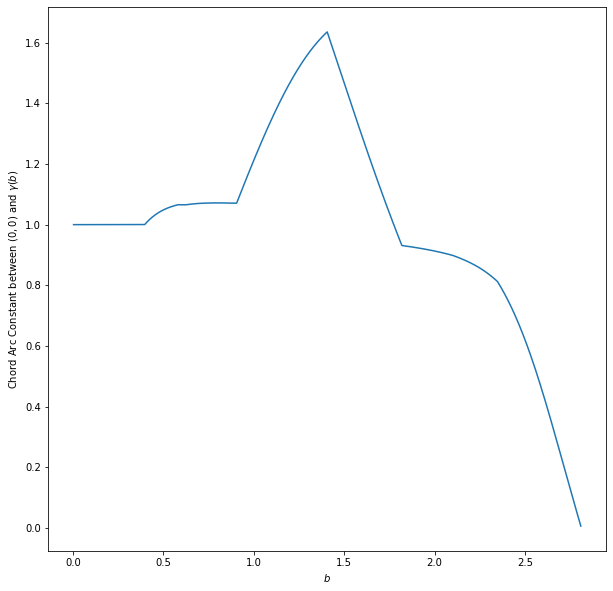

In [3]:
# sample many points between 0 and max chord length (l)
b_values = np.linspace(0,l,num=1000,endpoint=False)

cac_values=[]
for b in b_values:
    cac_values.append(min(l-b,b)/(np.linalg.norm(gamma(coords, b))))
_=plt.plot(b_values, cac_values)
_=plt.ylabel('Chord Arc Constant between $(0,0)$ and $\gamma(b)$')
_=plt.xlabel('$b$')

In [ ]:
max_ind = cac_values.index(np.nanmax(cac_values))

point = gamma(coords, b_values[max_ind])
print(point)

# plot to test
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', c='k')
# first vertex is in red
plt.plot(coords[0][0],coords[0][1], '-o', c='red')
# second vertex is in yellow
# plt.plot(coords[1][0],coords[1][1], '-o', c='y')
# gamma(b) is in blue
plt.plot(point[0],point[1], '-o', c='b')

# Polygonal Chain

In [19]:
# generate a polygonal chain
coords = polygon(20)
k=5
coords = np.array(coords) - np.array(coords[k])

# total chord length (l) of the polygon
l = max_chord_length(coords)
print(l)

4.38164559740634


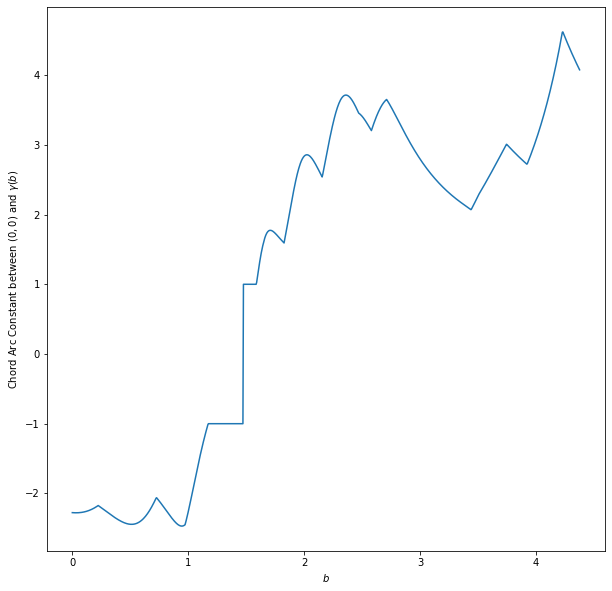

In [22]:
# sample many points between 0 and max chord length (l)
b_values = np.linspace(0,l,num=1000,endpoint=False)

c=sum([np.linalg.norm(coords[i]-coords[i+1]) for i in range(len(coords)-1)][:k])

cac_values=[]
for b in b_values:
    cac_values.append((b-c)/(np.linalg.norm(gamma(coords, b))))
_=plt.plot(b_values, cac_values)
_=plt.ylabel('Chord Arc Constant between $(0,0)$ and $\gamma(b)$')
_=plt.xlabel('$b$')

In [28]:
np.nanmax(cac_values)

2.0827064237040114

[-0.41647361  0.42807471]


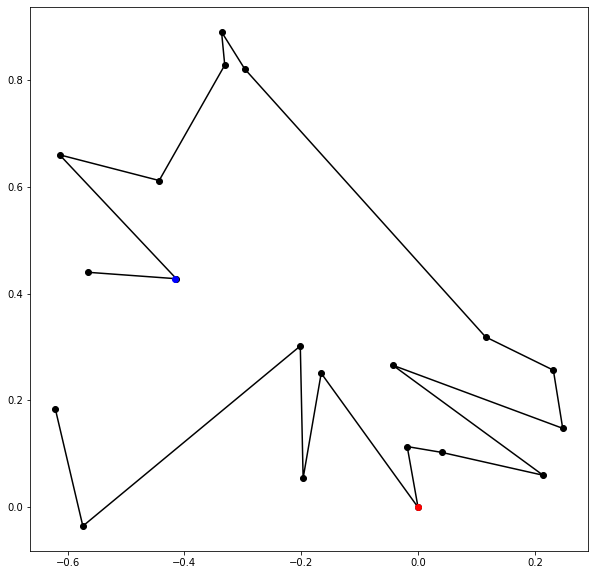

In [24]:
max_ind = cac_values.index(np.nanmax(cac_values))

point = gamma(coords, b_values[max_ind])
print(point)

# plot to test
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', c='k')
# selected vertex is in red
plt.plot(0,0, '-o', c='red')
# second vertex is in yellow
# plt.plot(coords[1][0],coords[1][1], '-o', c='y')
# gamma(b) is in blue
plt.plot(point[0],point[1], '-o', c='b')